In [1]:
import numpy as np
import librosa
import noisereduce as nr
import matplotlib.pyplot as plt
import sounddevice as sd
import IPython.display as ipd
import pandas as pd
from librosa import effects
import scipy.signal as sp
import statistics as st


In [3]:
def get_n_fft_val(y,sr):
  duration = len(y)/sr

  if(duration < 2.0):
    n_fft_val =512
  else:
    n_fft_val = 1024   

  return n_fft_val

In [13]:
def reduce_audio_noise(y,sr):

    n_fft_val = get_n_fft_val(y,sr)

    reduced_noise = nr.reduce_noise(y=y,sr=sr,stationary=False,prop_decrease=0.8,n_fft=n_fft_val,freq_mask_smooth_hz=300, time_mask_smooth_ms=50)  

    return reduced_noise

In [4]:
def get_compress(reduced_noise):
  
  y_comp = librosa.effects.preemphasis(reduced_noise, coef=0.97)

  return y_comp


In [5]:
def print_wave(y):
  
  librosa.display.waveshow(y)


In [112]:
y, sr = librosa.load('iNat888729.ogg')

In [113]:
ipd.Audio(y,rate=sr,autoplay=False)

In [114]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

In [115]:
print(tempo)

[123.046875]


In [116]:
print(beats)

[  6  30  53  75  97 118 139 161 183 205 227 248 270 290 311 333 354 376
 397 418 439 460 482 504 524 545 567]


In [117]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         aggregate=np.median)

In [121]:
y_red = reduce_audio_noise(y,sr)

In [122]:
ipd.Audio(y_red,rate=sr,autoplay=False)

In [123]:
tempo_red, beats_red = librosa.beat.beat_track(y=y_red, sr=sr)

In [124]:
print(tempo_red)

[123.046875]


In [125]:
print(beats_red)

[  7  31  53  75  97 118 139 161 183 205 227 248 270 290 311 333 354 376
 397 418 439 461 483 504 524 545 567]


In [126]:
print(beats)

[  6  30  53  75  97 118 139 161 183 205 227 248 270 290 311 333 354 376
 397 418 439 460 482 504 524 545 567]


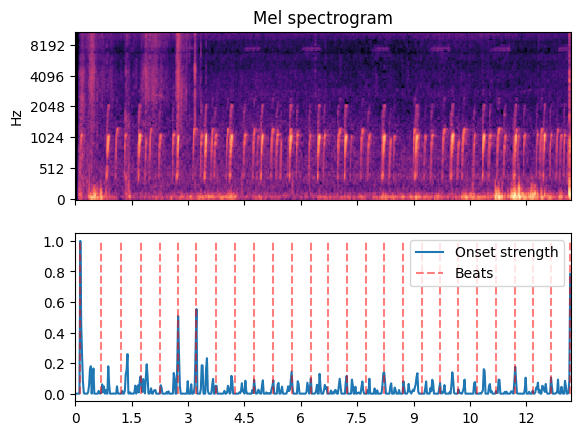

In [120]:
hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[1].legend()

In [127]:
onset_env_red = librosa.onset.onset_strength(y=y_red, sr=sr,
                                         aggregate=np.median)

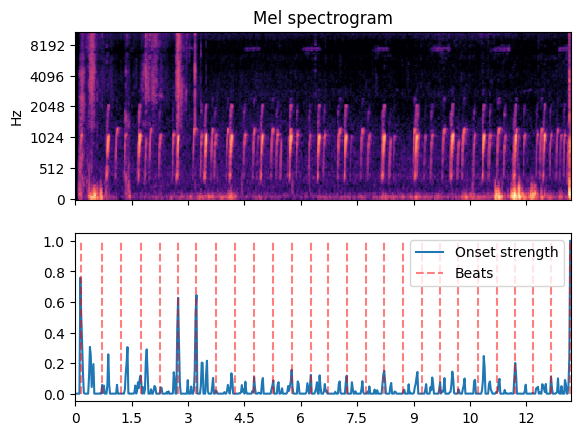

In [128]:
hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env_red, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y_red, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env_red),
         label='Onset strength')
ax[1].vlines(times[beats_red], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[1].legend()